# Importing Libraries

In [107]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import scipy.cluster.hierarchy as shc

In [53]:
from sklearn import datasets
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer Dataset

In [57]:
cancer = datasets.load_breast_cancer()

# Main Keys Of Dataset

In [58]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


# Description Of Dataset

In [59]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# Converting Loaded Dataset Of Breast Cancer Into Data Frame

In [74]:
# Read the DataFrame, first using the feature data
BreastCancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# Add a target column, and fill it with the target data
BreastCancer['target'] = cancer.target
# Show the first five rows
BreastCancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# First 10 Records

In [75]:
BreastCancer.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


# Finding Statistics

In [76]:
BreastCancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Dataset Info

In [77]:
BreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Data Cleaning

# Finding Null Values

In [78]:
for col in BreastCancer.columns:
    print(col , BreastCancer[col].isnull().sum())

mean radius 0
mean texture 0
mean perimeter 0
mean area 0
mean smoothness 0
mean compactness 0
mean concavity 0
mean concave points 0
mean symmetry 0
mean fractal dimension 0
radius error 0
texture error 0
perimeter error 0
area error 0
smoothness error 0
compactness error 0
concavity error 0
concave points error 0
symmetry error 0
fractal dimension error 0
worst radius 0
worst texture 0
worst perimeter 0
worst area 0
worst smoothness 0
worst compactness 0
worst concavity 0
worst concave points 0
worst symmetry 0
worst fractal dimension 0
target 0


As you can see above total null values in dataset. No need to clean

# Checking Duplicate Records

In [79]:
BreastCancer.duplicated(subset=None,keep='first').sum()

0

# Data Shape

In [80]:
print('No of rows and Columns')
BreastCancer.shape

No of rows and Columns


(569, 31)

# Question (a)

<h2>Apply Hierarchical Clustering with different linkage criteria (Ward, Maximum or complete linkage, Average linkage, Single linkage) and discuss the results obtained.</h2>

<h4>Except target feature all other features are in float data type. Only diagnosis is of int data type and its attributes are "0" and "1". 0 for "Malignant" and 1 for "Benign".</h4>

Now i am creating two data frames from this dataset one is of target variable/feature and other is of remaining features of dataset. This is done for ease of use when comparing target feature with the results obtained with different methods for clustering.

In [81]:
y_test = pd.DataFrame()
y_test['target'] = BreastCancer['target']
# Droping target feature from our dataset. which we need to apply algorithms.
BreastCancer = BreastCancer.drop('target',axis=1)
BreastCancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Scaling Dataset

we need to scale the data afront to apply the algo as Measurement units weight one better than other and affect final result of clustering algorithm. For example the parameters may be 'Height (m)' or 'Weight (pounds)' of humans. Height is a small in units (eg 1.8m) which may be weighted less when compared to weight (160 pounds etc) as machine understand only numerics and do not care about units. 

In [82]:
X = pd.DataFrame(preprocessing.scale(BreastCancer.iloc[:,:]))

# Hierarchical Clustering 

Here i am applying hierarchical clustring with different linkage criteria ward, single, complete, average

In [83]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
np.set_printoptions(precision=4, suppress=True)

# Ward Linkage Criteria

Unlike the others. Instead of measuring the distance directly, ward linkage criteria analyzes the variance of clusters. Ward’s is said to be the most suitable method for quantitative variables.

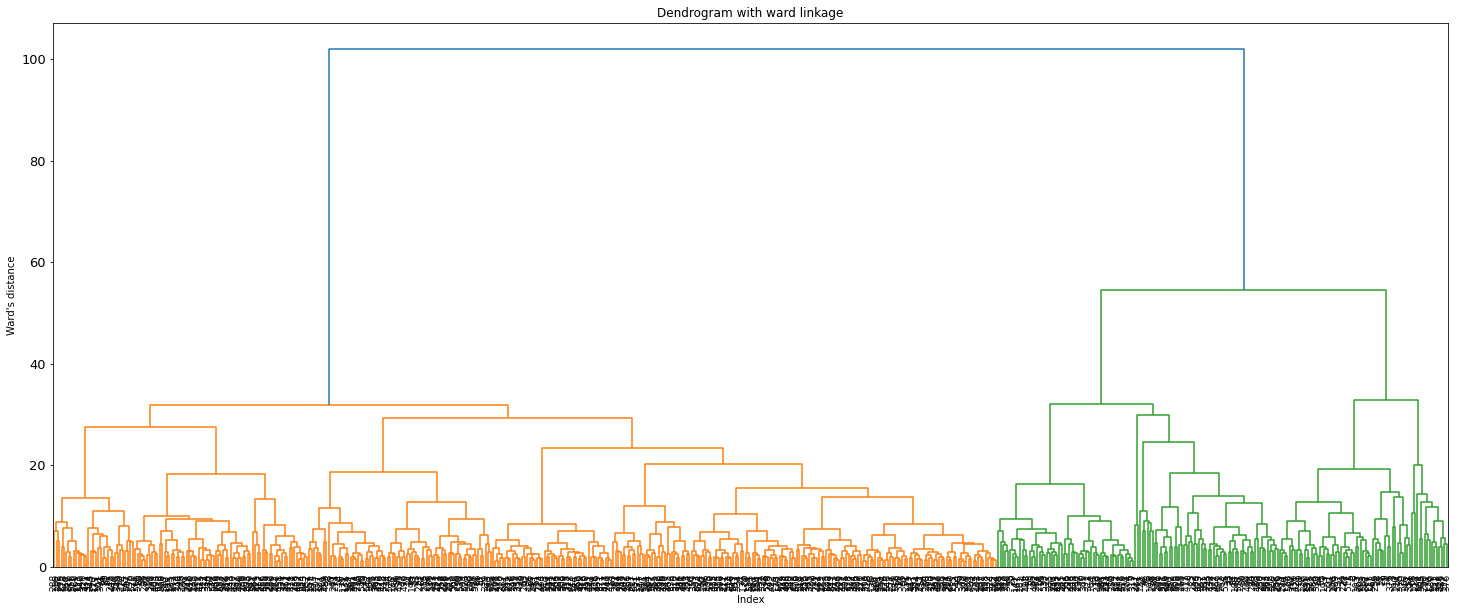

In [85]:
plt.figure(figsize=(25,10))
plt.title("Dendrogram with ward linkage")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
dendrogram(linkage(X, method='ward'),
           leaf_rotation=90.,
           leaf_font_size=9.,);

With al the 569 observations given, each observation distance to the other observation is calculated. The one with the minimum is then clubbed together. And this process is repeated for each obervation/cluster until all the observation become one single cluster. 

# Truncate Dendogram

Now truncating dendogram to find the highest distance within their child clusters

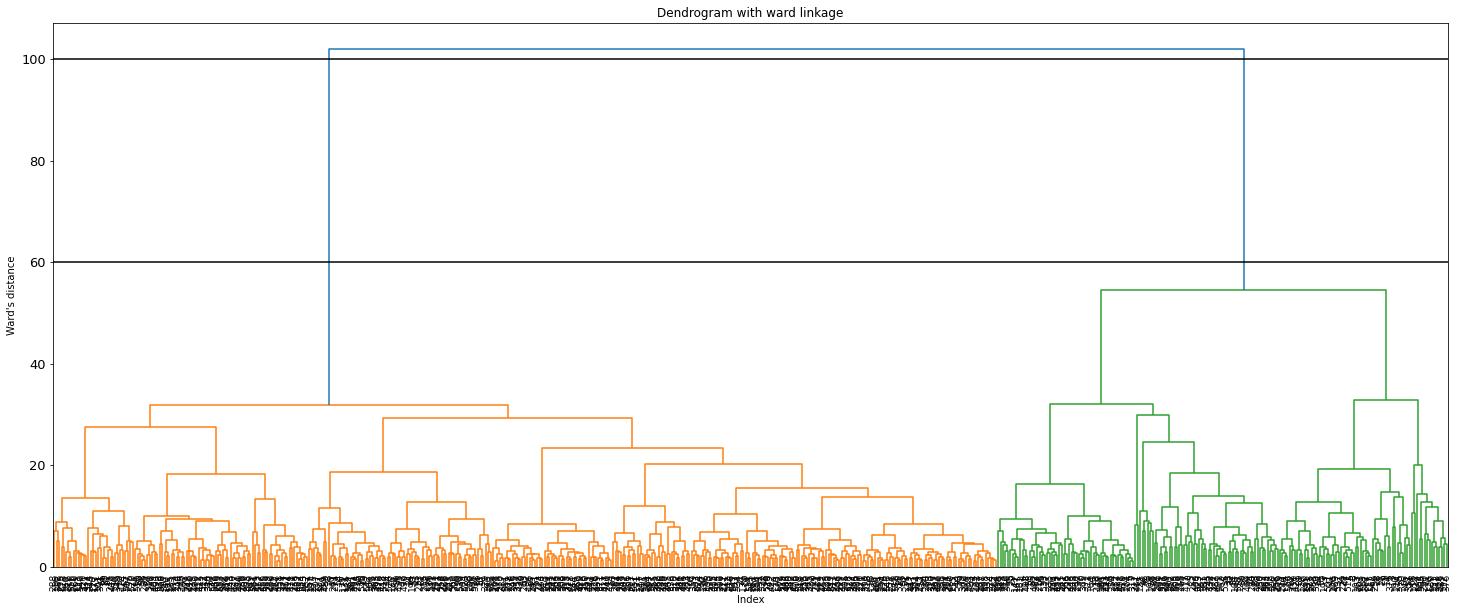

In [91]:
plt.figure(figsize=(25,10))
plt.title("Dendrogram with ward linkage")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
dendrogram(linkage(X, method='ward'),
           leaf_rotation=90.,
           leaf_font_size=9.,);
plt.axhline(60, c='k');
plt.axhline(100, c='k');

Here the highest distance between the parent cluster and all of the child clusters are maximum at 100/60 approx (the black line drawn across). And it divides the child clusters into 2 which is normally taken as the number of clusters for the dataset provided. Based on business domain one can further classify to more clusters but this is typically left upto individuals how many clusters they want as there is no single answer to the numbers of clusters selection.

<h3>Ward distance between parent clusters and child clusters are maximum 100/60 aproximatly</h3>

# Comparing Target Feature With Ward's Hierachical Clustering Through Confusion Matrix

In [93]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import confusion_matrix
max_d = 60
distance = linkage(X, 'ward')
clusters = pd.DataFrame(fcluster(distance, max_d, criterion = 'distance'))
clusters[0] = clusters[0].map({1:1,2:0}) 
print(confusion_matrix(y_test, clusters))  

[[164  48]
 [ 20 337]]


# Single Linkage Criteria

 It is the Shortest Distance between the closest points of the clusters.

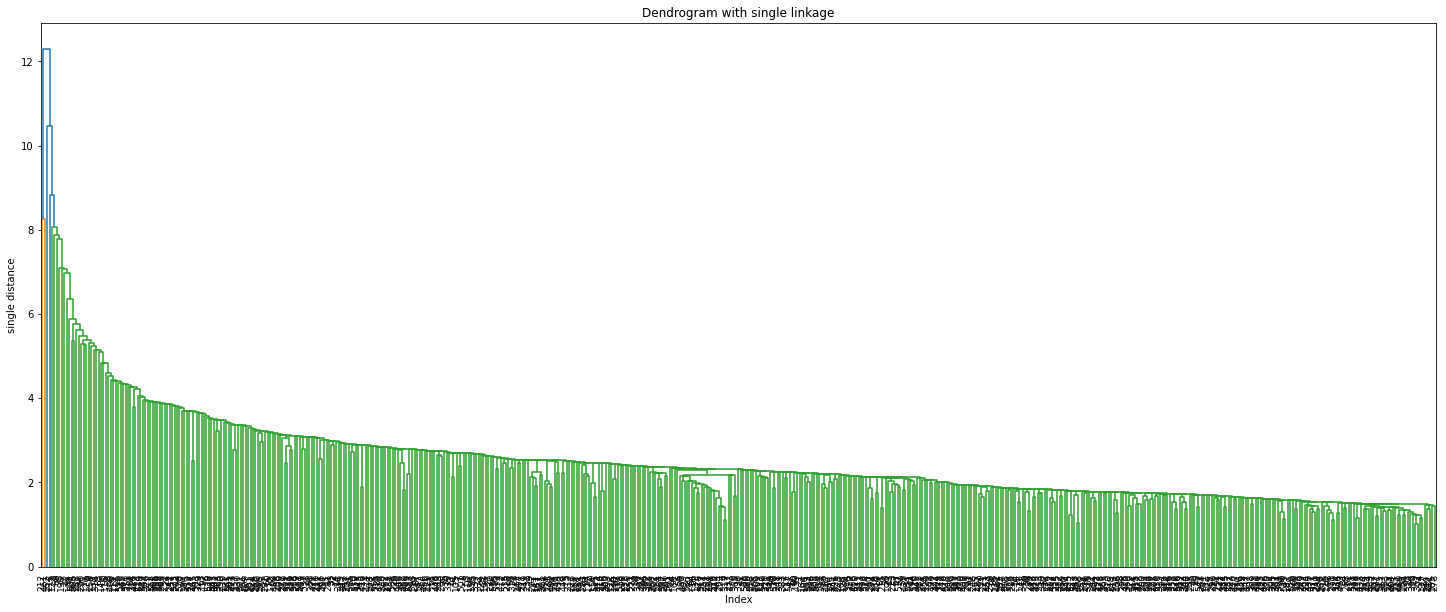

In [87]:
plt.figure(figsize=(25,10))
plt.title("Dendrogram with single linkage")
plt.xlabel("Index")
plt.ylabel("single distance")
dendrogram(linkage(X, method='single'),
           leaf_rotation=90.,
           leaf_font_size=9.,);

<h3>Single distance between parent clusters and child clusters are maximum 13/9 aproximatly</h3>

# Complete Linkage Criteria 

It is the farthest distance between the two points of two different clusters. It is one of the popular linkage methods as it forms tighter clusters than single-linkage.

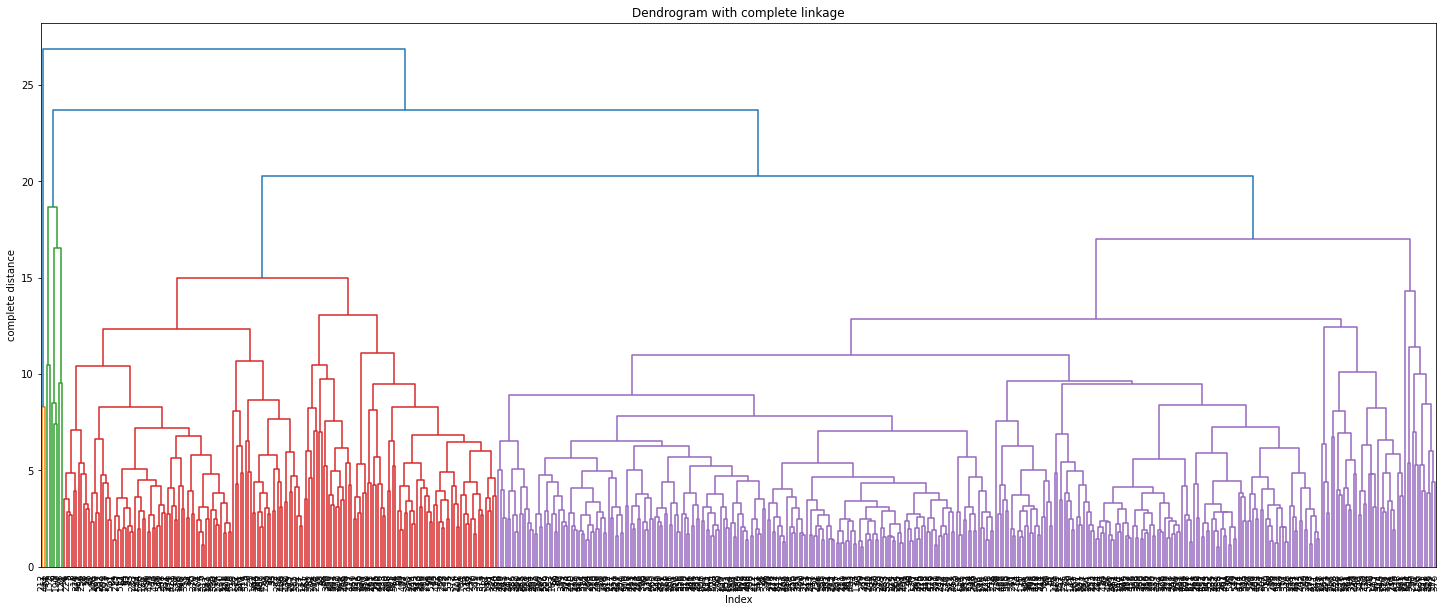

In [88]:
plt.figure(figsize=(25,10))
plt.title("Dendrogram with complete linkage")
plt.xlabel("Index")
plt.ylabel("complete distance")
dendrogram(linkage(X, method='complete'),
           leaf_rotation=90.,
           leaf_font_size=9.,);

<h3>Complete distance between parent clusters and child clusters are maximum 27/8 aproximatly</h3>

# Average Linkage Criteria 

It is the linkage method in which the distance between each pair of datasets is added up and then divided by the total number of datasets to calculate the average distance between two clusters. It is also one of the most popular linkage methods.

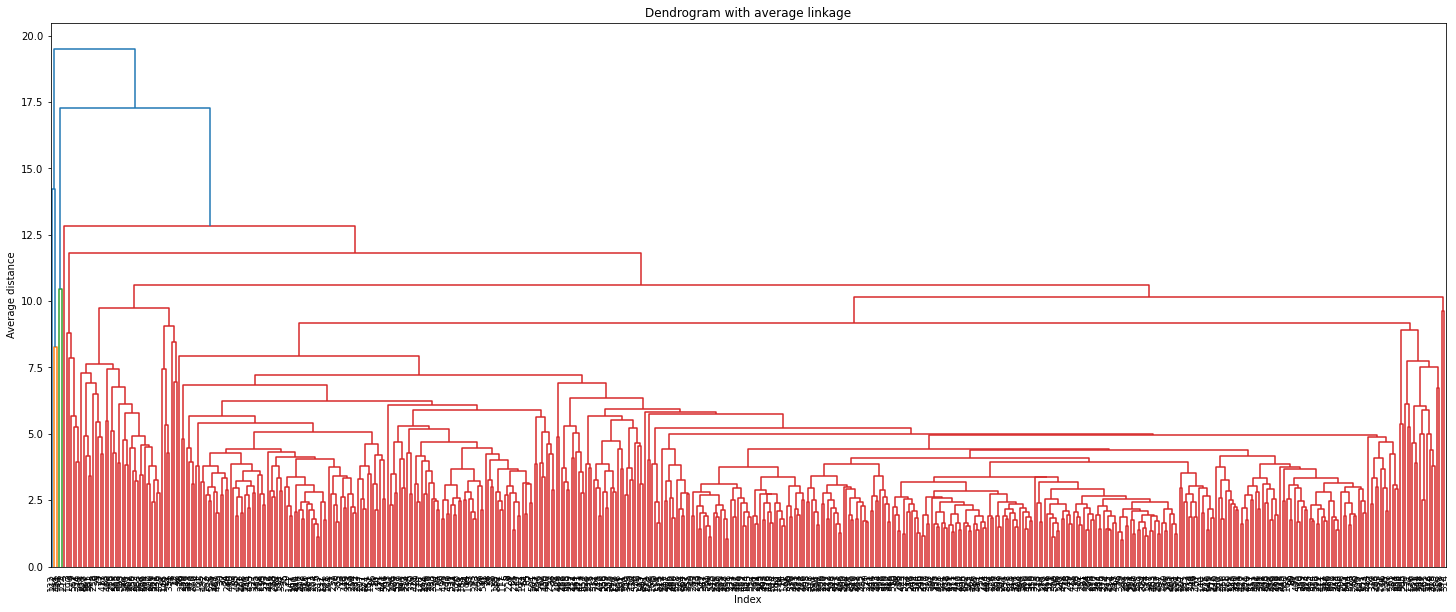

In [90]:
plt.figure(figsize=(25,10))
plt.title("Dendrogram with average linkage")
plt.xlabel("Index")
plt.ylabel("Average distance")
dendrogram(linkage(X, method='average'),
           leaf_rotation=90.,
           leaf_font_size=9.,);

<h3>Average distance between parent clusters and child clusters are maximum 19/14 aproximatly</h3>

# Results Obtained By All 4 Different Linkage Criteria Is:

<h3>Ward distance between parent clusters and child clusters are maximum 100/60 aproximatly</h3>
<h3>Single distance between parent clusters and child clusters are maximum 13/9 aproximatly</h3>
<h3>Complete distance between parent clusters and child clusters are maximum 27/8 aproximatly</h3>
<h3>Average distance between parent clusters and child clusters are maximum 19/14 aproximatly</h3>

<h3>Ward distance is larger than other distances. As complete linkage is the farthest distance between the two points of two different clusters and here its distance is greater than single and average distance and lesser than ward or variance of clusters. As single linkage presents the Shortest Distance between the closest points of the clusters and here with respect to this dataset single distance is lesser than other distances. So our results are correct.</h3>

# Question (b)

<h2>Apply the k-Means clustering algorithm with parameters optimization and evaluate the performance, discuss the results obtained.</h2>

# k-Means Clustering Algorithm

K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science.

# Creating Object Of K-Means with Parameter optimization

In [101]:
from sklearn.cluster import KMeans        
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42, n_init=10,
                max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, 
                copy_x=True, n_jobs=None, algorithm='auto')
kmeans

KMeans(n_clusters=2, n_jobs=None, precompute_distances='auto', random_state=42)

# Fit And Predict The Model

In [102]:
y_kmeans = kmeans.fit_predict(X) 
y_kmeans

C:\Users\SCM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\SCM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

# Accuracy Of K-Means

In [106]:
print( "Accuracy : " ,accuracy_score(y_test, y_kmeans))

Accuracy :  0.9103690685413005


<h3>Accuracy is 91%. Its great</h3>

# Classification Report Of K-Means

In [108]:
print(classification_report(y_test, y_kmeans))

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



<h3>Precision is above 90 and recall is above 80 and 90. K-Means Performed better</h3>

# Confusion Matrix Of K-Means

In [113]:
KM_CM = confusion_matrix(y_test, y_kmeans)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_kmeans))


Confusion Matrix
[[175  37]
 [ 14 343]]


# Visualizong Confusing Matrix

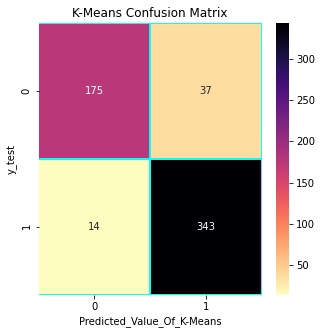

In [111]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(KM_CM, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='magma_r')
plt.title('K-Means Confusion Matrix')
plt.xlabel('Predicted_Value_Of_K-Means')
plt.ylabel('y_test')
plt.show()

<h3>True positive and true nagitive values are greater than false positive and false negitive.K-Means performed very well</h3>

# Conclusion: K-Means Algorithm Performed Well 